## Backtesting Trading Strategies

Let's take the Golden and Death cross example from the technical analysis file and simulate a simple trading strategy where we buy on the Golden Cross and sell on the Death Cross. For simplicity, we will only simulate long positions (no short selling).

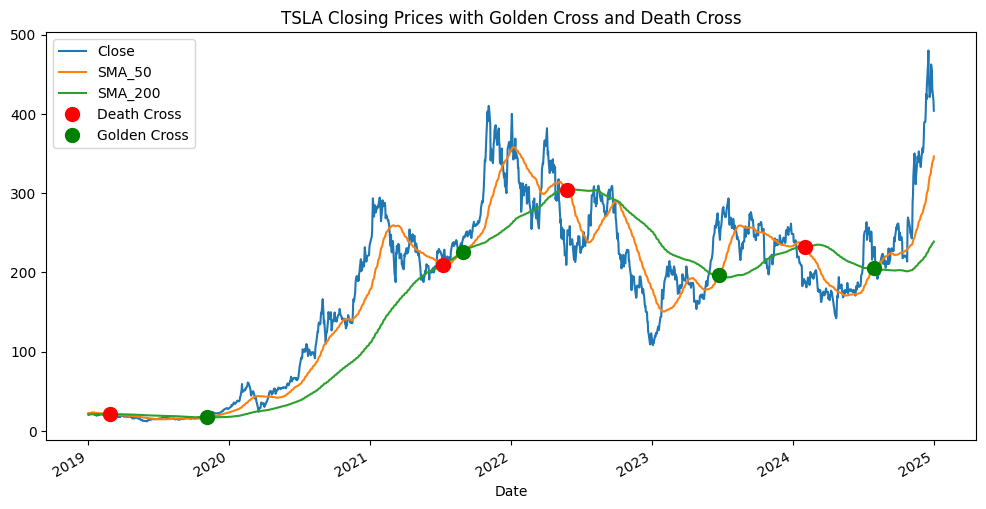

In [3]:
import matplotlib.pyplot as plt
import yfinance as yf

tesla_df = yf.Ticker("TSLA").history(period="max")

tesla_df['SMA_50'] = tesla_df['Close'].rolling(window=50).mean()
tesla_df['SMA_200'] = tesla_df['Close'].rolling(window=200).mean()

tesla_df['Signal'] = 0
tesla_df.loc[tesla_df['SMA_50'] > tesla_df['SMA_200'], 'Signal'] = 1
tesla_df.loc[tesla_df['SMA_50'] < tesla_df['SMA_200'], 'Signal'] = -1

tesla_df['Crossover'] = tesla_df['Signal'].diff()

tesla_df_small = tesla_df.loc['2019':'2024']

fig, ax = plt.subplots(figsize=(12, 6))
tesla_df_small[['Close', 'SMA_50', 'SMA_200']].plot(ax=ax, title="TSLA Closing Prices with Golden Cross and Death Cross")

crosses = tesla_df_small[tesla_df_small['Crossover'] != 0]
for idx, row in crosses.iterrows():
    if row['Crossover'] == 2:
        plt.plot(idx, row['SMA_50'], 'go', markersize=10, label='Golden Cross' if 'Golden Cross' not in [text.get_text() for text in ax.get_legend().get_texts()] else "")
    elif row['Crossover'] == -2:
        plt.plot(idx, row['SMA_50'], 'ro', markersize=10, label='Death Cross' if 'Death Cross' not in [text.get_text() for text in ax.get_legend().get_texts()] else "")
    plt.legend()

plt.show()

In [2]:
initial_capital = 10000
end_capital = initial_capital
buy_price = 0

for idx, row in crosses.iterrows():
    # Simulating buying on Golden Cross
    if row['Crossover'] == 2:
        buy_price = row['Close']
        print(f'Bought at: ${buy_price:.2f}.')

    # Simulating selling on Death Cross
    elif row['Crossover'] == -2 and buy_price != 0:
        sell_price = row['Close']
        gain_pct = (sell_price-buy_price) / buy_price
        print(f'Sold at: ${sell_price:.2f}. Gained {gain_pct*100:.2f}%.')
        end_capital = (1+gain_pct) * end_capital

# Calculating total gain percentage
total_pct_gain = (end_capital-initial_capital) / initial_capital

print(f'Initial: ${initial_capital}. Ended with: ${end_capital:.2f}. Gained: {total_pct_gain*100:.2f}%.') 

Bought at: $21.15.
Sold at: $218.98. Gained 935.48%.
Bought at: $243.64.
Sold at: $235.91. Gained -3.17%.
Bought at: $256.60.
Sold at: $188.86. Gained -26.40%.
Bought at: $232.10.
Initial: $10000. Ended with: $73795.31. Gained: 637.95%.


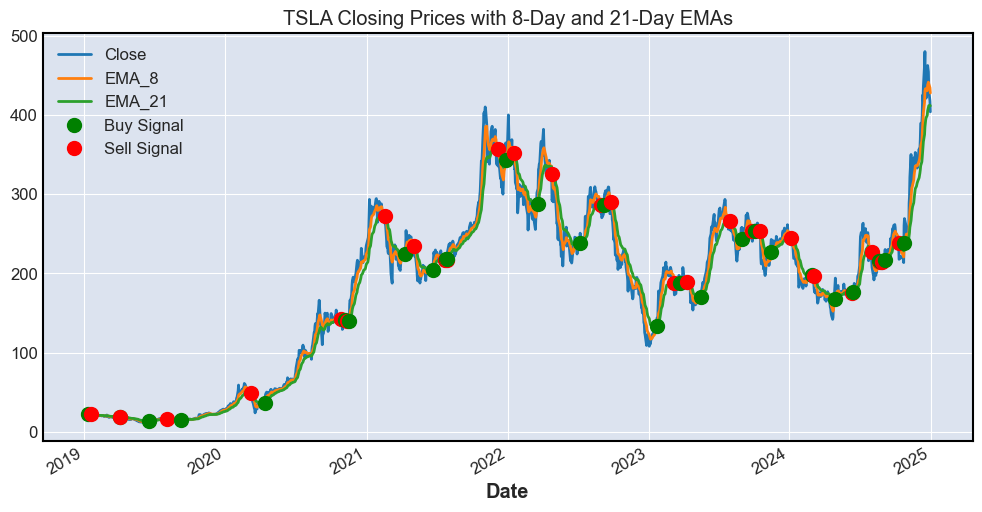

In [10]:
import mplfinance as mpf 

tesla_df['EMA_8'] = tesla_df['Close'].ewm(span=8).mean()
tesla_df['EMA_21'] = tesla_df['Close'].ewm(span=21).mean()

tesla_df['EMA_Signal'] = 0
tesla_df.loc[tesla_df['EMA_8'] > tesla_df['EMA_21'], 'EMA_Signal'] = 1
tesla_df.loc[tesla_df['EMA_8'] < tesla_df['EMA_21'], 'EMA_Signal'] = -1

tesla_df['EMA_Crossover'] = tesla_df['EMA_Signal'].diff()
tesla_df_small = tesla_df.loc['2019':'2024']

fig, ax = plt.subplots(figsize=(12, 6))
tesla_df_small[['Close', 'EMA_8', 'EMA_21']].plot(ax=ax, title="TSLA Closing Prices with 8-Day and 21-Day EMAs")

ema_crosses = tesla_df_small[tesla_df_small['EMA_Crossover'] != 0]
for idx, row in ema_crosses.iterrows():
    if row['EMA_Crossover'] == 2:
        plt.plot(idx, row['EMA_8'], 'go', markersize=10, label='Buy Signal' if 'Buy Signal' not in [text.get_text() for text in ax.get_legend().get_texts()] else "")
    elif row['EMA_Crossover'] == -2:
        plt.plot(idx, row['EMA_8'], 'ro', markersize=10, label='Sell Signal' if 'Sell Signal' not in [text.get_text() for text in ax.get_legend().get_texts()] else "")
    plt.legend()

plt.show()

In [11]:
initial_capital = 10000
end_capital = initial_capital
buy_price = 0

for idx, row in ema_crosses.iterrows():
    
    if row['EMA_Crossover'] == 2:
        buy_price = row['Close']
        print(f'Bought at: ${buy_price:.2f}.')

    # Simulating selling on Death Cross
    elif row['EMA_Crossover'] == -2 and buy_price != 0:
        sell_price = row['Close']
        gain_pct = (sell_price-buy_price) / buy_price
        print(f'Sold at: ${sell_price:.2f}. Gained {gain_pct*100:.2f}%.')
        end_capital = (1+gain_pct) * end_capital

# Calculating total gain percentage
total_pct_gain = (end_capital-initial_capital) / initial_capital

print(f'Initial: ${initial_capital}. Ended with: ${end_capital:.2f}. Gained: {total_pct_gain*100:.2f}%.') 

Bought at: $23.15.
Sold at: $20.15. Gained -12.96%.
Bought at: $19.45.
Sold at: $17.85. Gained -8.23%.
Bought at: $15.00.
Sold at: $15.62. Gained 4.14%.
Bought at: $15.45.
Sold at: $46.90. Gained 203.50%.
Bought at: $43.40.
Sold at: $140.09. Gained 222.82%.
Bought at: $143.32.
Sold at: $136.79. Gained -4.56%.
Bought at: $147.20.
Sold at: $266.05. Gained 80.74%.
Bought at: $225.67.
Sold at: $228.30. Gained 1.16%.
Bought at: $206.94.
Sold at: $214.46. Gained 3.63%.
Bought at: $219.21.
Sold at: $214.93. Gained -1.95%.
Bought at: $225.78.
Sold at: $336.34. Gained 48.96%.
Bought at: $362.82.
Sold at: $343.50. Gained -5.32%.
Bought at: $307.05.
Sold at: $292.14. Gained -4.86%.
Bought at: $250.76.
Sold at: $275.61. Gained 9.91%.
Bought at: $299.68.
Sold at: $276.01. Gained -7.90%.
Bought at: $143.89.
Sold at: $172.92. Gained 20.18%.
Bought at: $192.22.
Sold at: $184.51. Gained -4.01%.
Bought at: $176.89.
Sold at: $261.07. Gained 47.59%.
Bought at: $256.90.
Sold at: $244.12. Gained -4.97%.
Bou